Шаг 1.  Изучите материалы лекционных и практических занятий по теме 7.2-7.3.

Шаг 2. Создайте программу, загружающую данные с файла (Алгоритм выполнения представлен в лекции по теме 7.3).

Шаг 3. Выполните задачу классификации (деревья решений, случайный лес, логистическая регрессия, метод опорных векторов) и кластерный анализ (Алгоритм выполнения представлен в лекции  по теме 7.3).

Шаг 4. Визуализируйте полученные результаты классификации (где возможно) и кластерного анализа (Алгоритм выполнения представлен в лекции по теме 7.3).

Шаг 5. Постройте модель прогноза. Проведите обучение модели (Алгоритм выполнения представлен в лекции по теме 7.3).

Шаг 6. Выполнить оценку модели (Алгоритм выполнения представлен в лекции по теме 7.3).

Шаг 7. Опубликуйте файл расширения ipynb, прикрепив его в этом задании.

В задании предполагается, что акцент делается на решение задач классификации и кластеризации.

**Задача классификации**

Имеется клиентская база телекоммуникационной компании. По каждому клиенту известен набор признаков, соответствующих используемым услугам компании и известно ушел клиент (`Да`) или остался (`Нет`). Постройте модель для прогноза ухода клиента.

Описание набора `classification_phone.csv` -- для классификации

|Признак|Комментарий|
|--:|:--|
|`Phone_number`|Номер телефона |
|`International_calls`|Международные звонки| 
|`Voice_mail`|Голосовая почта|
|`Number_of_voicemails`|Количество голосовых  сообщений|
|`Daytime_minutes_used`|Использовано дневных минут|
|`Number_of_calls_during_the_day`|Количество звонков днем|
|`Monthly fee`|Дневная абонентская плата|
|`Used_evening_minutes`|Использовано вечерних минут|
|`Number_of_calls_in_the_evening`|Количество звонков вечером|
|`Subscription_fee_in_the_evening`|Вечерная абонентская плата|
|`Using_night_minutes`|Использование ночных минут|
|`Number_of_night_calls`|Количество ночных звонков|
|`Nightly_subscription_fee`|Ночная абонентская плата|
|`Minutes_of_long_distance_calls`|Минут междугородних разговоров|
|`Number_of_international_calls`|Число международных звонков|
|`Subscription_fee_for_international_calls`|Абонентская плата|
|`The_number_of_calls_to_the_service_department`|Число обращений в сервисную службу| 
|`churn`|Уход|

**Задача кластеризации**

Имеется клиентская база телекоммуникационной компании. По каждому клиенту известен набор признаков, соответствующих используемым услугам компании. Требуется построить профили клиентов компании.

Описание набора `cluster_phone.csv` -- для кластеризации

|Признак|Комментарий|
|--:|:--|
|`Phone_number`|Номер телефона |
|`International_calls`|Международные звонки| 
|`Voice_mail`|Голосовая почта|
|`Number_of_voicemails`|Количество голосовых  сообщений|
|`Daytime_minutes_used`|Использовано дневных минут|
|`Number_of_calls_during_the_day`|Количество звонков днем|
|`Monthly fee`|Дневная абонентская плата|
|`Used_evening_minutes`|Использовано вечерних минут|
|`Number_of_calls_in_the_evening`|Количество звонков вечером|
|`Subscription_fee_in_the_evening`|Вечерная абонентская плата|
|`Using_night_minutes`|Использование ночных минут|
|`Number_of_night_calls`|Количество ночных звонков|
|`Nightly_subscription_fee`|Ночная абонентская плата|
|`Minutes_of_long_distance_calls`|Минут междугородних разговоров|
|`Number_of_international_calls`|Число международных звонков|
|`Subscription_fee_for_international_calls`|Абонентская плата|
|`The_number_of_calls_to_the_service_department`|Число обращений в сервисную службу| 

## Задача классификации

### 1. задать вопрос

Модель должна быть способна принимать информацию о клиентах компании  и прогнозировать, останеться ли клиент лояльным. 

### 2. Сбор данных

Загрузка данных из представленного файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

#загрузка классификаторов 
from sklearn.tree import DecisionTreeClassifier, plot_tree # дерево решений
from sklearn.ensemble import RandomForestClassifier #случайный лес
from sklearn.linear_model import LogisticRegression # логистическая регрессия
from sklearn.svm import SVC # метод опорных векторов

#метрики
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [2]:
df_class = pd.read_csv('classification_phone.csv')

In [3]:
df_class.head()

,Phone_number,International_calls,Voice_mail,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department,churn
0,382-4657,нет,да,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,Нет
1,371-7191,нет,да,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,Нет
2,358-1921,нет,нет,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,Нет
3,375-9999,да,нет,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,Нет
4,330-6626,да,нет,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,Нет


In [4]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Phone_number                                   3333 non-null   object 
 1   International_calls                            3333 non-null   object 
 2   Voice_mail                                     3333 non-null   object 
 3   Number_of_voicemails                           3333 non-null   int64  
 4   Daytime_minutes_used                           3333 non-null   float64
 5   Number_of_calls_during_the_day                 3333 non-null   int64  
 6   Monthly fee                                    3333 non-null   float64
 7   Used_evening_minutes                           3333 non-null   float64
 8   Number_of_calls_in_the_evening                 3333 non-null   int64  
 9   Subscription_fee_in_the_evening                3333 

### 3. Создание признаков

Столбец Phone_number имеет тип данных object и не данные не являются категориальными, поэтому его можем удалить.
Из остальных строковых столбцов создаем фиктивные столбцы

In [5]:
df_class = df_class.drop(columns=['Phone_number'])

In [6]:
df_class = pd.get_dummies(df_class, drop_first=True)

In [7]:
df_class.head()

,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department,International_calls_нет,Voice_mail_нет,churn_Нет
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,1,1
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,1
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,1


In [8]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Number_of_voicemails                           3333 non-null   int64  
 1   Daytime_minutes_used                           3333 non-null   float64
 2   Number_of_calls_during_the_day                 3333 non-null   int64  
 3   Monthly fee                                    3333 non-null   float64
 4   Used_evening_minutes                           3333 non-null   float64
 5   Number_of_calls_in_the_evening                 3333 non-null   int64  
 6   Subscription_fee_in_the_evening                3333 non-null   float64
 7   Using_night_minutes                            3333 non-null   float64
 8   Number_of_night_calls                          3333 non-null   int64  
 9   Nightly_subscription_fee                       3333 

Создаем объект X с элементами и серию y с метками

In [9]:
y = df_class.churn_Нет
X = df_class.drop(columns='churn_Нет')

### 4. Выборка данных

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size = 0.3,
                                                    random_state = 42)

### 5. Нормализация данных

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [14]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### 6. Создание модели

#### Дерево решений

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

DecisionTreeClassifier()

#### Случайный лес

In [16]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_std, y_train)

RandomForestClassifier(random_state=42)

#### Логистическая регрессия

In [17]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_std, y_train)

LogisticRegression(random_state=42)

#### Метод опорных векторов

In [18]:
svc = SVC(random_state=42)
svc.fit(X_train_std, y_train)

SVC(random_state=42)

### 7. Оценка модели

#### Дерево решений

In [19]:
dt.score(X_test_std, y_test)

0.918

#### Случайный лес

In [20]:
rf.score(X_test_std, y_test)

0.955

#### Логистическая регрессия

In [21]:
lr.score(X_test_std, y_test)

0.865

#### Метод опорных векторов

In [22]:
svc.score(X_test_std, y_test)

0.923

### 8. Матрица неточностей

#### Дерево решений

In [23]:
y_pred = dt.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[106,  37],
       [ 45, 812]])

#### Случайный лес

In [24]:
y_pred = rf.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[103,  40],
       [  5, 852]])

#### Логистическая регрессия

In [25]:
y_pred = lr.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[ 31, 112],
       [ 23, 834]])

#### Метод опорных векторов

In [26]:
y_pred = svc.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[ 73,  70],
       [  7, 850]])

## Задача кластеризации

**Задача кластеризации**

Имеется клиентская база телекоммуникационной компании. По каждому клиенту известен набор признаков, соответствующих используемым услугам компании. Требуется построить профили клиентов компании.

Описание набора `cluster_phone.csv` -- для кластеризации

|Признак|Комментарий|
|--:|:--|
|`Phone_number`|Номер телефона |
|`International_calls`|Международные звонки| 
|`Voice_mail`|Голосовая почта|
|`Number_of_voicemails`|Количество голосовых  сообщений|
|`Daytime_minutes_used`|Использовано дневных минут|
|`Number_of_calls_during_the_day`|Количество звонков днем|
|`Monthly fee`|Дневная абонентская плата|
|`Used_evening_minutes`|Использовано вечерних минут|
|`Number_of_calls_in_the_evening`|Количество звонков вечером|
|`Subscription_fee_in_the_evening`|Вечерная абонентская плата|
|`Using_night_minutes`|Использование ночных минут|
|`Number_of_night_calls`|Количество ночных звонков|
|`Nightly_subscription_fee`|Ночная абонентская плата|
|`Minutes_of_long_distance_calls`|Минут междугородних разговоров|
|`Number_of_international_calls`|Число международных звонков|
|`Subscription_fee_for_international_calls`|Абонентская плата|
|`The_number_of_calls_to_the_service_department`|Число обращений в сервисную службу| 

### Сбор данных

Загрузка данных из представленного файла

In [27]:
df_clust = pd.read_csv('cluster_phone.csv')

In [28]:
df_clust.head()

,Phone_number,International_calls,Voice_mail,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department
0,382-4657,нет,да,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,371-7191,нет,да,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,358-1921,нет,нет,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,375-9999,да,нет,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,330-6626,да,нет,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [29]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Phone_number                                   3333 non-null   object 
 1   International_calls                            3333 non-null   object 
 2   Voice_mail                                     3333 non-null   object 
 3   Number_of_voicemails                           3333 non-null   int64  
 4   Daytime_minutes_used                           3333 non-null   float64
 5   Number_of_calls_during_the_day                 3333 non-null   int64  
 6   Monthly fee                                    3333 non-null   float64
 7   Used_evening_minutes                           3333 non-null   float64
 8   Number_of_calls_in_the_evening                 3333 non-null   int64  
 9   Subscription_fee_in_the_evening                3333 

In [30]:
df_clust.describe()

,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [31]:
df_clust.corr()

,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department
Number_of_voicemails,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Daytime_minutes_used,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Number_of_calls_during_the_day,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Monthly fee,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Used_evening_minutes,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Number_of_calls_in_the_evening,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Subscription_fee_in_the_evening,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Using_night_minutes,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
Number_of_night_calls,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802
Nightly_subscription_fee,0.007663,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186,-0.009277


### Создание признаков
Для постройки профилей клиентов компании используем количество и стоимость звонков совершаемых клиентом.

In [32]:
col = ['Monthly fee'
       , 'Number_of_calls_during_the_day'
       , 'Subscription_fee_in_the_evening'
       , 'Number_of_calls_in_the_evening'
       , 'Nightly_subscription_fee'
       , 'Number_of_night_calls'
       , 'Subscription_fee_for_international_calls'
       , 'Number_of_international_calls'
      ]

In [33]:
df_clust[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Monthly fee                               3333 non-null   float64
 1   Number_of_calls_during_the_day            3333 non-null   int64  
 2   Subscription_fee_in_the_evening           3333 non-null   float64
 3   Number_of_calls_in_the_evening            3333 non-null   int64  
 4   Nightly_subscription_fee                  3333 non-null   float64
 5   Number_of_night_calls                     3333 non-null   int64  
 6   Subscription_fee_for_international_calls  3333 non-null   float64
 7   Number_of_international_calls             3333 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 208.4 KB


In [34]:
df_clust[col].head()

,Monthly fee,Number_of_calls_during_the_day,Subscription_fee_in_the_evening,Number_of_calls_in_the_evening,Nightly_subscription_fee,Number_of_night_calls,Subscription_fee_for_international_calls,Number_of_international_calls
0,45.07,110,16.78,99,11.01,91,2.70,3
1,27.47,123,16.62,103,11.45,103,3.70,3
2,41.38,114,10.30,110,7.32,104,3.29,5
3,50.90,71,5.26,88,8.86,89,1.78,7
4,28.34,113,12.61,122,8.41,121,2.73,3


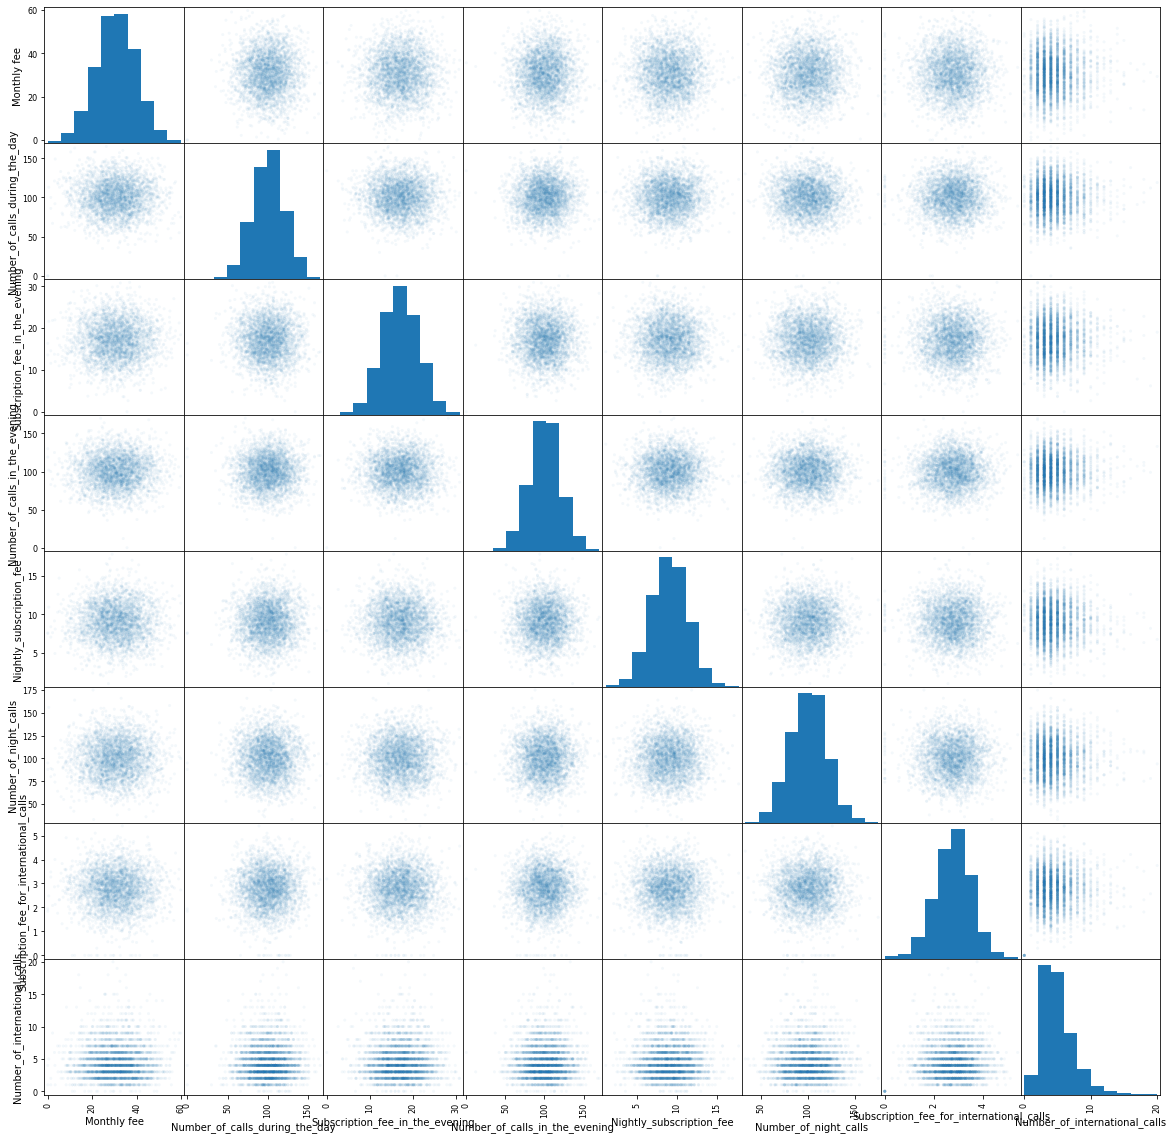

In [35]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(df_clust[col], alpha=0.05, figsize=(20, 20));

In [36]:
df_clust[col].corr()

,Monthly fee,Number_of_calls_during_the_day,Subscription_fee_in_the_evening,Number_of_calls_in_the_evening,Nightly_subscription_fee,Number_of_night_calls,Subscription_fee_for_international_calls,Number_of_international_calls
Monthly fee,1.000000,0.006753,0.007036,0.015769,0.004301,0.022972,-0.010094,0.008032
Number_of_calls_during_the_day,0.006753,1.000000,-0.021449,0.006462,0.022927,-0.019557,0.021666,0.004574
Subscription_fee_in_the_evening,0.007036,-0.021449,1.000000,-0.011423,-0.012601,0.007596,-0.011074,0.002541
Number_of_calls_in_the_evening,0.015769,0.006462,-0.011423,1.000000,-0.002056,0.007710,0.008674,0.017434
Nightly_subscription_fee,0.004301,0.022927,-0.012601,-0.002056,1.000000,0.011188,-0.015186,-0.012329
Number_of_night_calls,0.022972,-0.019557,0.007596,0.007710,0.011188,1.000000,-0.013630,0.000305
Subscription_fee_for_international_calls,-0.010094,0.021666,-0.011074,0.008674,-0.015186,-0.013630,1.000000,0.032372
Number_of_international_calls,0.008032,0.004574,0.002541,0.017434,-0.012329,0.000305,0.032372,1.000000


### Нормализация данных

загружаем библиотеку препроцесинга данных
эта библиотека автоматически приведен данные к нормальным значениям

In [37]:
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df_clust[col].values)

In [38]:
dataNorm[:5]

array([[0.75570087, 0.66666667, 0.54286639, 0.58235294, 0.59593545,
        0.4084507 , 0.5       , 0.15      ],
       [0.46059691, 0.74545455, 0.53769007, 0.60588235, 0.62223551,
        0.49295775, 0.68518519, 0.15      ],
       [0.69382964, 0.69090909, 0.33322549, 0.64705882, 0.37537358,
        0.5       , 0.60925926, 0.25      ],
       [0.85345406, 0.43030303, 0.17017147, 0.51764706, 0.46742379,
        0.3943662 , 0.32962963, 0.35      ],
       [0.47518444, 0.68484848, 0.40795859, 0.71764706, 0.440526  ,
        0.61971831, 0.50555556, 0.15      ]])

## Иерархическая кластеризация

### Агломеративный алгоритм

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import numpy as np

Вычислим расстояния между каждым набором данных,
Вычисляем евклидово расстояние


In [40]:
data_dist = pdist(dataNorm, 'euclidean')

Объедение элементов в кластера и сохранение в 
специальной переменной (используется ниже для визуализации 
и выделения количества кластеров


In [41]:
data_linkage = linkage(data_dist, method='ward')

### Оценка оптимального количества сегментов
Используем метод локтя для оценки оптимального количества сегментов.


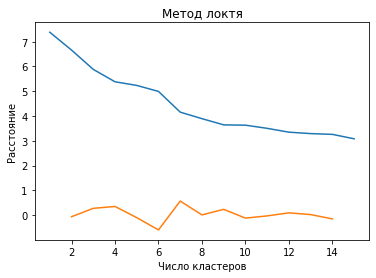

clusters: 7


In [42]:
last = data_linkage[-15:, 2] # в матрице связей берем последние 20 значений расстояний между кластерами 
last_rev = last[::-1] #переписываем в обратном порядке  
idxs = np.arange(1, len(last) + 1,1) #генерируем список начальное значение 1, конечное --- число элементов массива, шаг 1
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev) #отображение графика 

 
acceleration = np.diff(last, 2) #расчет вторых разностей 
acceleration_rev = acceleration[::-1] #переписываем в обратном порядке
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2   
print("clusters:", k)

In [43]:
nclust = 7

In [44]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
data_linkage[:40]

array([[ 1569.000,  2782.000,  0.044,  2.000],
       [ 641.000,  2778.000,  0.056,  2.000],
       [ 775.000,  2431.000,  0.059,  2.000],
       [ 446.000,  1439.000,  0.061,  2.000],
       [ 1484.000,  3052.000,  0.066,  2.000],
       [ 1133.000,  1988.000,  0.067,  2.000],
       [ 905.000,  2316.000,  0.070,  2.000],
       [ 1327.000,  2443.000,  0.070,  2.000],
       [ 350.000,  1248.000,  0.070,  2.000],
       [ 235.000,  1768.000,  0.071,  2.000],
       [ 1588.000,  1970.000,  0.071,  2.000],
       [ 764.000,  3248.000,  0.071,  2.000],
       [ 1237.000,  3199.000,  0.072,  2.000],
       [ 86.000,  1022.000,  0.074,  2.000],
       [ 1749.000,  2243.000,  0.074,  2.000],
       [ 189.000,  1509.000,  0.075,  2.000],
       [ 1234.000,  1951.000,  0.075,  2.000],
       [ 303.000,  1971.000,  0.075,  2.000],
       [ 1940.000,  2495.000,  0.075,  2.000],
       [ 1140.000,  3232.000,  0.076,  2.000],
       [ 1976.000,  2624.000,  0.078,  2.000],
       [ 734.000,  1009.

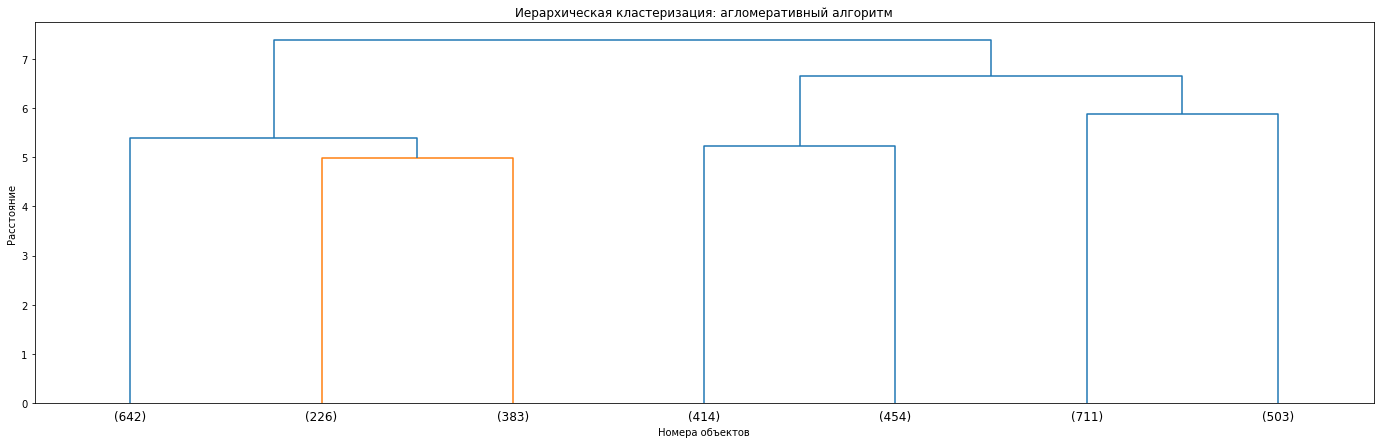

In [45]:
plt.figure(figsize=(24,7))
dendrogram(data_linkage, 
            p = nclust,
            truncate_mode = 'lastp',
            leaf_rotation = 0,
            leaf_font_size = 12)
plt.title('Иерархическая кластеризация: агломеративный алгоритм')
plt.ylabel('Расстояние')
plt.xlabel('Номера объектов')
plt.show()

### Качество кластеризации

In [46]:
c, coph_dists = cophenet(data_linkage, pdist(dataNorm))

In [47]:
c

0.21399135857534363

In [48]:
clusters=fcluster(data_linkage, nclust, criterion='maxclust')
clusters

array([6, 4, 5, ..., 3, 7, 3], dtype=int32)

#### Cредние цифры по кластерам и количество объектов (Количество)

In [49]:
df_clust['Number_Clust']=clusters
res=df_clust.groupby('Number_Clust')[col].mean()
res['Количество']=df_clust.groupby('Number_Clust').size().values
res #ниже 

,Monthly fee,Number_of_calls_during_the_day,Subscription_fee_in_the_evening,Number_of_calls_in_the_evening,Nightly_subscription_fee,Number_of_night_calls,Subscription_fee_for_international_calls,Number_of_international_calls,Количество
Number_Clust,,,,,,,,,
1,23.044034,100.951713,14.808676,97.221184,9.302975,90.459502,2.640748,4.017134,642
2,28.789912,106.738938,17.658894,96.920354,8.799115,97.557522,2.738982,9.181416,226
3,26.624073,96.360313,21.412820,102.315927,8.560366,87.443864,2.678668,4.229765,383
4,26.201667,107.478261,18.055217,97.074879,9.305314,118.526570,3.233937,4.111111,414
5,34.671696,104.414097,13.363040,95.218062,8.488436,100.200441,3.347313,4.374449,454
6,39.980774,94.701828,18.112110,103.410689,9.574360,96.886076,2.774768,4.306610,711
7,30.520060,98.765408,17.536501,105.827038,8.697455,112.520875,2.072883,3.789264,503


In [50]:
# df_clust['Number_Clust'].value_counts()

In [51]:
df_clust.groupby('Number_Clust')\
  .agg(Размерность_кластера = ('Number_Clust', 'count'))\
  .reset_index()\
  .sort_values(by = 'Размерность_кластера', ascending=False)

,Number_Clust,Размерность_кластера
5,6,711
0,1,642
6,7,503
4,5,454
3,4,414
2,3,383
1,2,226


Просмотр по кластерам 

In [52]:
df_clust[df_clust['Number_Clust']==3]

,Phone_number,International_calls,Voice_mail,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department,Number_Clust
14,366-9238,нет,нет,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,3
16,350-8884,нет,да,27,196.4,139,33.39,280.9,90,23.88,89.3,75,4.02,13.8,4,3.73,1,3
25,331-3698,нет,нет,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,3
50,413-4957,нет,нет,0,191.9,108,32.62,269.8,96,22.93,236.8,87,10.66,7.8,5,2.11,3,3
53,404-3211,нет,нет,0,160.2,117,27.23,267.5,67,22.74,228.5,68,10.28,9.3,5,2.51,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,340-9013,нет,нет,0,78.1,70,13.28,239.3,115,20.34,144.4,112,6.50,12.3,4,3.32,1,3
3318,397-9928,нет,нет,0,124.9,131,21.23,300.5,118,25.54,192.5,106,8.66,11.6,4,3.13,2,3
3328,414-4276,нет,да,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,3
3330,328-8230,нет,нет,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,3


In [53]:
model = AgglomerativeClustering(n_clusters=nclust)
model = model.fit(dataNorm)

In [54]:
len(model.labels_)

3333

## Неиерархическая кластеризация: алгоритм  $к$-средних

In [55]:
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [56]:
km = KMeans(n_clusters=nclust).fit(dataNorm)

выведем полученное распределение по кластерам
так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1


In [57]:
km.labels_ +1

array([3, 3, 4, ..., 6, 1, 3], dtype=int32)

#### Cредние цифры по кластерам и количество объектов (Количество)

In [58]:
# к оригинальным данным добавляем номера кластеров
df_clust['KMeans']=km.labels_+1
res=df_clust.groupby('KMeans')[col].mean()
res['Количество']=df_clust.groupby('KMeans').size().values
res

,Monthly fee,Number_of_calls_during_the_day,Subscription_fee_in_the_evening,Number_of_calls_in_the_evening,Nightly_subscription_fee,Number_of_night_calls,Subscription_fee_for_international_calls,Number_of_international_calls,Количество
KMeans,,,,,,,,,
1,31.568566,101.240310,16.859419,102.511628,8.642248,102.965116,2.729070,9.988372,258
2,25.551751,96.587525,19.005573,97.257545,8.513018,120.305835,3.215915,3.935614,497
3,38.844067,103.198413,17.158492,102.642857,11.407143,98.650794,3.060079,4.085317,504
4,39.019640,99.616906,17.240144,99.381295,6.751924,94.343525,2.850054,3.893885,556
5,23.551271,100.577570,12.344505,97.867290,9.165981,91.771963,2.955009,3.985047,535
6,24.244951,104.691262,21.020485,103.227184,9.272951,85.314563,2.688388,4.411650,515
7,31.328739,97.230769,15.984359,99.117521,9.582821,111.307692,1.751239,3.779915,468


In [59]:
df_clust.groupby('KMeans')\
  .agg(Размерность_кластера = ('KMeans', 'count'))\
  .reset_index()\
  .sort_values(by = 'Размерность_кластера', ascending=False)

,KMeans,Размерность_кластера
3,4,556
4,5,535
5,6,515
2,3,504
1,2,497
6,7,468
0,1,258


Просмотр по кластерам

In [60]:
df_clust[df_clust['KMeans']==1]

,Phone_number,International_calls,Voice_mail,Number_of_voicemails,Daytime_minutes_used,Number_of_calls_during_the_day,Monthly fee,Used_evening_minutes,Number_of_calls_in_the_evening,Subscription_fee_in_the_evening,Using_night_minutes,Number_of_night_calls,Nightly_subscription_fee,Minutes_of_long_distance_calls,Number_of_international_calls,Subscription_fee_for_international_calls,The_number_of_calls_to_the_service_department,Number_Clust,KMeans
22,358-1958,нет,нет,0,183.0,112,31.11,72.9,99,6.20,181.8,78,8.18,9.5,19,2.57,0,2,1
39,332-9891,нет,нет,0,140.4,94,23.87,271.8,92,23.10,188.3,108,8.47,11.1,9,3.00,1,7,1
41,383-6029,да,да,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,2,1
59,355-7251,нет,нет,0,229.3,103,38.98,177.4,126,15.08,189.3,95,8.52,12.0,8,3.24,1,6,1
103,401-7594,нет,нет,0,135.0,99,22.95,183.6,106,15.61,245.3,102,11.04,12.5,9,3.38,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,363-1123,нет,нет,0,190.4,91,32.37,92.0,107,7.82,224.8,108,10.12,13.6,17,3.67,2,2,1
3316,390-6388,нет,да,29,164.1,111,27.90,219.1,96,18.62,220.3,108,9.91,12.3,9,3.32,0,2,1
3317,379-7290,да,нет,0,197.2,90,33.52,188.5,113,16.02,211.1,94,9.50,7.8,8,2.11,1,6,1
3321,400-2738,нет,нет,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,5,1
